In [2]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [3]:
df=pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
x=df[["Annual Income (k$)","Spending Score (1-100)"]]

In [7]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


Text(0, 0.5, 'Spending score')

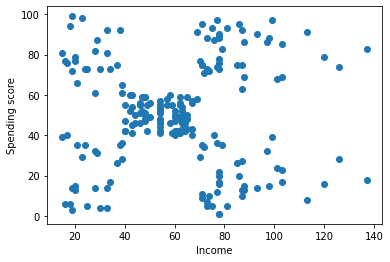

In [8]:
plt.scatter(x["Annual Income (k$)"],x["Spending Score (1-100)"])
plt.xlabel("Income")
plt.ylabel("Spending score")

In [9]:
sse=[]
for k in range(1,50):
    km=KMeans(n_clusters=k)
    km.fit(x)
    sse.append(km.inertia_)

Text(0, 0.5, 'sse')

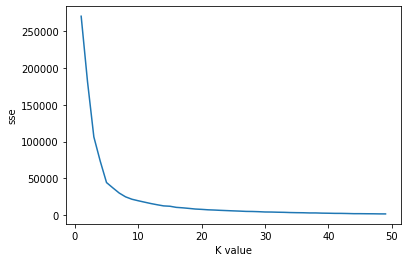

In [10]:
plt.plot(range(1,50),sse)
plt.xlabel("K value")
plt.ylabel("sse")

Text(0, 0.5, 'sse')

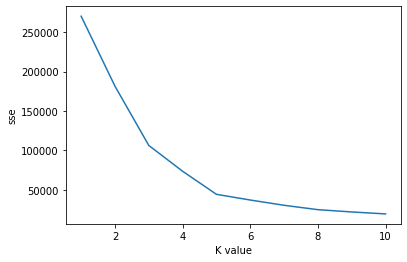

In [11]:
sse=[]
for k in range(1,11):
    km=KMeans(n_clusters=k)
    km.fit(x)
    sse.append(km.inertia_)
plt.plot(range(1,11),sse)
plt.xlabel("K value")
plt.ylabel("sse") 

In [12]:
#elbow at 5 so take k=5
km=KMeans(n_clusters=5)
pred=km.fit_predict(x)
pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [13]:
df["cluster"]=pred
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


In [14]:
centroid=km.cluster_centers_
centroid

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

Text(0.5, 1.0, 'Clustered diagram')

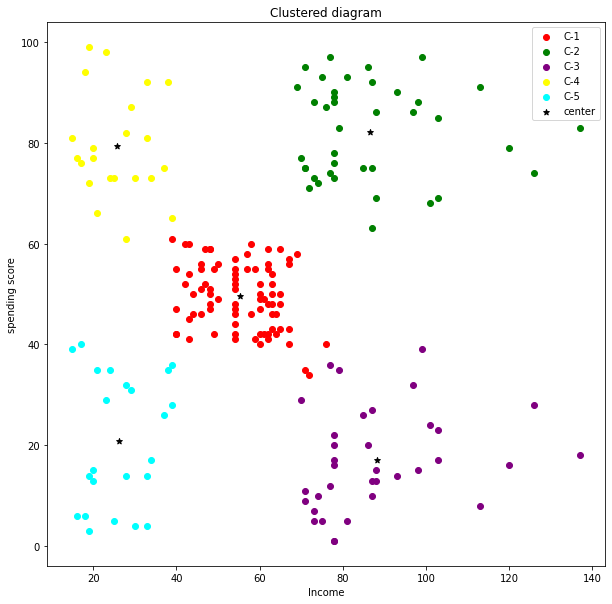

In [15]:
plt.figure(figsize=(10,10))
plt.scatter(df[df["cluster"]==0]["Annual Income (k$)"],df[df["cluster"]==0]["Spending Score (1-100)"],color="red",label="C-1")
plt.scatter(df[df["cluster"]==1]["Annual Income (k$)"],df[df["cluster"]==1]["Spending Score (1-100)"],color="green",label="C-2")
plt.scatter(df[df["cluster"]==2]["Annual Income (k$)"],df[df["cluster"]==2]["Spending Score (1-100)"],color="purple",label="C-3")
plt.scatter(df[df["cluster"]==3]["Annual Income (k$)"],df[df["cluster"]==3]["Spending Score (1-100)"],color="yellow",label="C-4")
plt.scatter(df[df["cluster"]==4]["Annual Income (k$)"],df[df["cluster"]==4]["Spending Score (1-100)"],color="cyan",label="C-5")
plt.scatter(centroid[:,0],centroid[:,1],marker="*",color="black",label="center")
plt.legend()
plt.xlabel("Income")
plt.ylabel("spending score")
plt.title("Clustered diagram")